In [1]:
import pandas as pd
import numpy as np
import re
import string
import os

trainPath = "data/train.csv"
testPath = "data/test.csv"
df_train = pd.read_csv(trainPath)
df_test = pd.read_csv(testPath)
df_train.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [3]:
df_train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
x=df_train.iloc[:,2:].sum()

rowsums=df_train.iloc[:,2:].sum(axis=1)
df_train['clean']=(rowsums==0)

print(len(df_train))
print(((df_train['clean'].sum())*100.0/len(df_train)),"%")
print(((len(df_train)-(df_train['clean'].sum()))*100.0/len(df_train)),"%")

159571
(89.83211235124176, '%')
(10.167887648758233, '%')


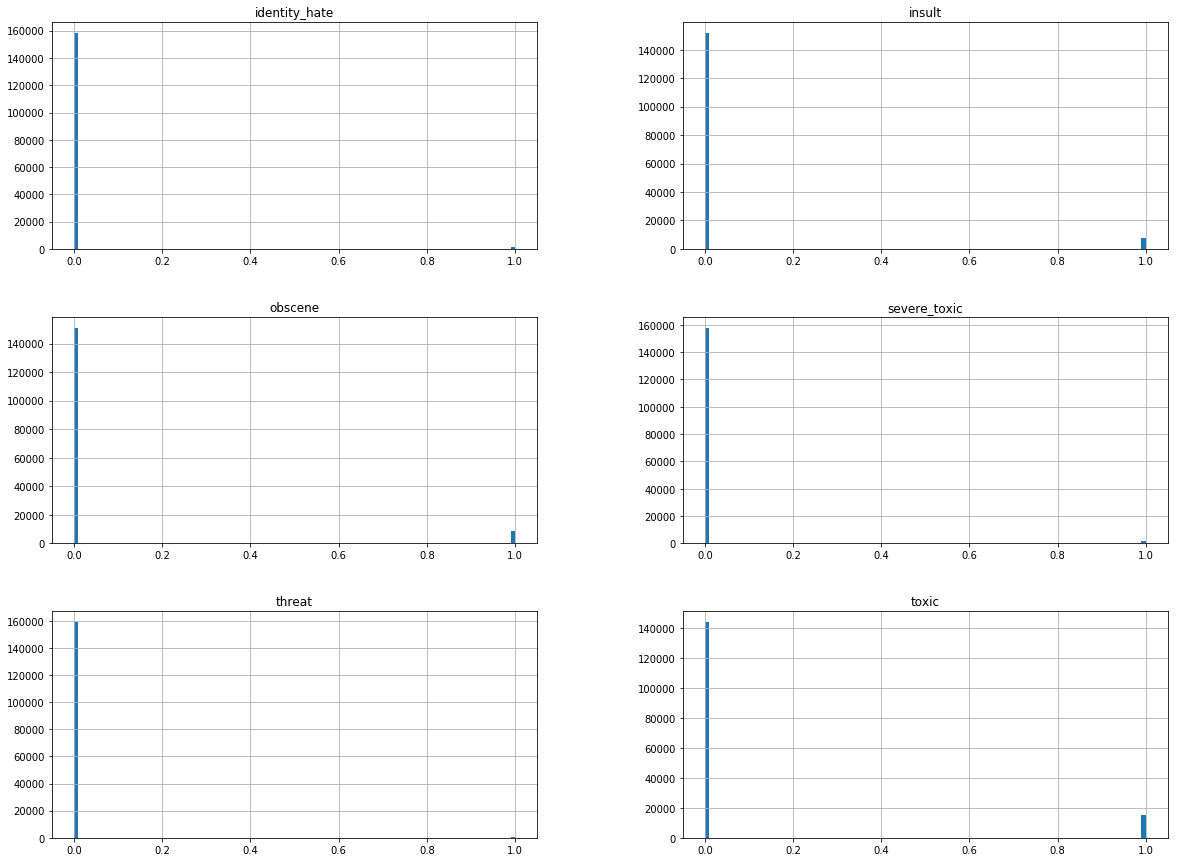

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
df_train[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].hist(bins=100, figsize=(20,15)) 
plt.show()

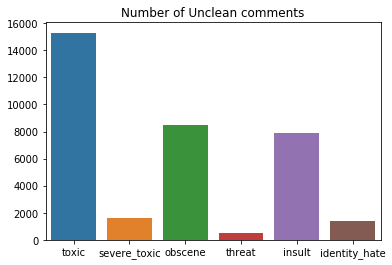

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

df_train['clean'] = df_train['clean'].astype(int) 
x=df_train.iloc[:,2:].sum()                    #sum all rows


all_tags_but_clean = x.drop('clean')
sns.barplot(all_tags_but_clean.index, all_tags_but_clean.values)
plt.title('Number of Unclean comments')
plt.show()

In [7]:
print 'Number of clean comments', x.values[6]

Number of clean comments 143346


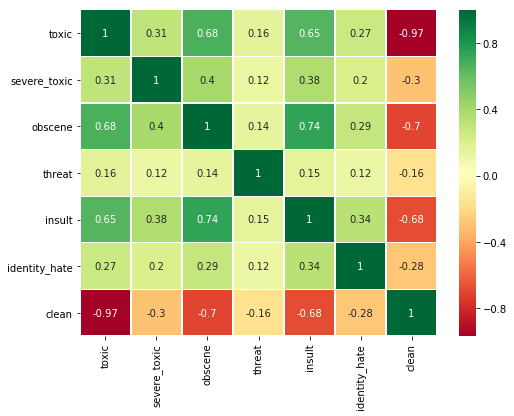

In [8]:
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.xticks(rotation=90)
plt.show()

In [9]:
from nltk.tokenize import TweetTokenizer # doesn't split at apostrophes
import nltk
from nltk import Text
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer

In [10]:
toxic_comnts = df_train[df_train.toxic==1]['comment_text']
t_tokenized_sents = [word_tokenize(sentences.decode('utf-8')) for sentences in toxic_comnts]
t_tagged = [pos_tag(words) for words in t_tokenized_sents]              

In [11]:
t_categories = [y for lists in t_tagged for x,y in lists]                    # extract tags
t_counting_catg = Counter(t_categories)
print t_counting_catg

Counter({'NNP': 151285, 'NN': 112249, '.': 99567, 'PRP': 69872, 'IN': 59699, 'DT': 54892, 'JJ': 53127, 'VBP': 44927, 'RB': 38210, 'VB': 36908, ',': 27974, 'NNS': 26131, 'VBZ': 22731, 'CC': 19671, 'PRP$': 15711, 'VBG': 15408, 'VBD': 14624, 'TO': 14615, "''": 11656, 'VBN': 10732, 'MD': 9562, ':': 8314, 'CD': 7525, '``': 6754, 'WP': 5438, 'WRB': 4412, 'RP': 3731, ')': 3461, '(': 2997, 'POS': 2402, 'WDT': 2250, 'JJR': 1741, 'UH': 974, 'EX': 968, 'JJS': 904, 'RBR': 648, 'NNPS': 635, 'PDT': 570, '$': 316, 'FW': 258, '#': 248, 'RBS': 182, 'SYM': 44, 'WP$': 34})


In [12]:
clean_comnts = df_train[df_train.toxic==0]['comment_text']
clean_comnts = clean_comnts[:10000]                                        
tokenized_sents = [word_tokenize(sentences.decode('utf-8')) for sentences in clean_comnts]
tagged = [pos_tag(words) for words in tokenized_sents] 

In [13]:
categories = [y for lists in tagged for x,y in lists]                     
counting_catg = Counter(categories)  
print counting_catg

Counter({'NN': 102228, 'IN': 79678, 'DT': 67754, 'NNP': 58882, 'PRP': 46973, 'JJ': 46729, 'RB': 41099, '.': 40296, 'VB': 36572, ',': 31352, 'NNS': 31103, 'VBP': 24691, 'VBZ': 23292, 'CC': 22268, 'TO': 19461, 'VBN': 17860, "''": 16839, 'VBD': 16002, 'VBG': 14252, 'MD': 11866, 'CD': 10697, '``': 10619, 'PRP$': 10274, ':': 9831, ')': 6357, '(': 5977, 'WRB': 3857, 'WP': 3673, 'WDT': 3614, 'POS': 2922, 'RP': 2101, 'EX': 1888, 'JJR': 1761, 'JJS': 1153, 'RBR': 976, 'NNPS': 865, 'UH': 551, 'PDT': 537, 'FW': 430, 'RBS': 410, '#': 409, '$': 135, 'WP$': 50, 'SYM': 29})


In [14]:
print nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [15]:
tknzr = TweetTokenizer()
t_sentences = [sent_tokenize(s.decode('utf-8')) for s in toxic_comnts]
t_lists_of_words = [tknzr.tokenize(words) for strings in t_sentences for words in strings]
t_only_letters = [regexp_tokenize(token, pattern='[a-zA-Z]+') for sublist in t_lists_of_words for token in sublist]
t_flat_list = [token for sublist in t_only_letters for token in sublist]
t_all_lower = [l.lower() for l in t_flat_list]
stopWords = set(stopwords.words('english'))
t_no_stpwrds = [token for token in t_all_lower if token not in stopWords]
commonly_toxic = Counter(t_no_stpwrds)

In [16]:
tknzr = TweetTokenizer()
sentences = [sent_tokenize(s.decode('utf-8')) for s in clean_comnts]
lists_of_words = [tknzr.tokenize(words) for strings in sentences for words in strings]
only_letters = [regexp_tokenize(token, pattern='[a-zA-Z]+') for sublist in lists_of_words for token in sublist]
flat_list = [token for sublist in only_letters for token in sublist]
all_lower = [l.lower() for l in flat_list]
stopWords = set(stopwords.words('english'))
no_stpwrds = [token for token in all_lower if token not in stopWords]
commonly_clean = Counter(no_stpwrds)

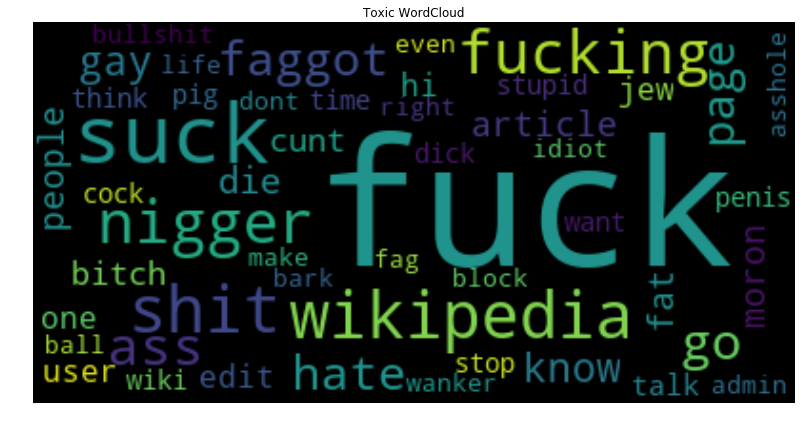

In [17]:
from wordcloud import WordCloud
toxicity = ' '.join(t_no_stpwrds)

wordcloud2 = WordCloud(collocations=False, relative_scaling=1, min_font_size=13,width=400, height=200)
wordcloud2.generate(toxicity)
plt.figure(figsize=(16,7))
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.title('Toxic WordCloud')
plt.show()


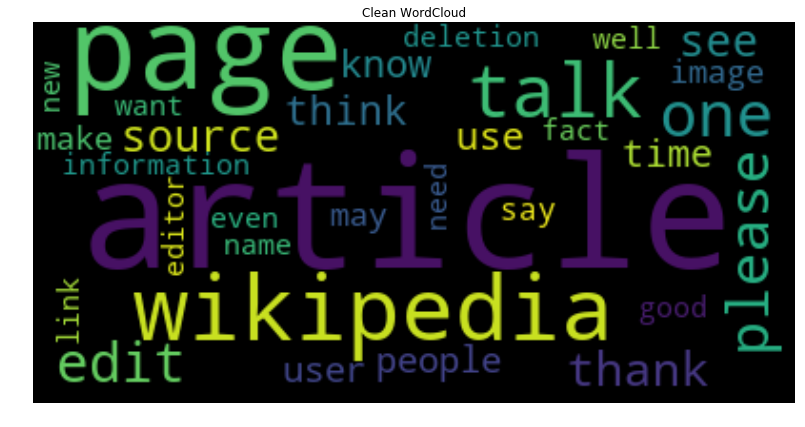

In [18]:
clean = ' '.join(no_stpwrds)

wordcloud2 = WordCloud(collocations=False, relative_scaling=1, min_font_size=13,width=400, height=200)
wordcloud2.generate(clean)
plt.figure(figsize=(16,7))
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.title('Clean WordCloud')
plt.show()

In [19]:
df_train['total_length'] = df_train['comment_text'].apply(len)
df_train['capitals'] = df_train['comment_text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
df_train['caps_vs_length'] = df_train.apply(lambda row: float(row['capitals'])/float(row['total_length']),
                                axis=1)
df_train['num_exclamation_marks'] = df_train['comment_text'].apply(lambda comment: comment.count('!'))
df_train['num_question_marks'] = df_train['comment_text'].apply(lambda comment: comment.count('?'))
df_train['num_punctuation'] = df_train['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in '.,;:'))
df_train['num_symbols'] = df_train['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in '*&$%'))
df_train['num_words'] = df_train['comment_text'].apply(lambda comment: len(comment.split()))
df_train['num_unique_words'] = df_train['comment_text'].apply(
    lambda comment: len(set(w for w in comment.split())))
df_train['words_vs_unique'] = df_train['num_unique_words'] / df_train['num_words']
df_train['num_smilies'] = df_train['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))

In [20]:
df_train.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,total_length,capitals,caps_vs_length,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_words,num_unique_words,words_vs_unique,num_smilies
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,264,17,0.064394,0,1,6,0,43,41,0.953488,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,112,8,0.071429,1,0,5,0,17,17,1.000000,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,233,4,0.017167,0,0,4,0,42,39,0.928571,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,622,11,0.017685,0,0,6,0,113,82,0.725664,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,67,2,0.029851,0,1,3,0,13,13,1.000000,0


In [21]:
toxic_words_list=['fuck', 'shit', 'nigger', 'ass', 'fucking', 'suck', 'gay', 'die', 'hate',  'pig', 'cunt', 'bitch', 'fat',  'penis',  'bullshit',  'bark',  'balls', 'dick', 'sex',  'stupid', 'sucks']
df_train['number_toxic_comnts'] = df_train['comment_text'].apply(lambda comment: sum(comment.count(w) for w in toxic_words_list))

In [22]:
clean_words_list = []
for x,y in commonly_clean.most_common(n=40):
    clean_words_list.append(x)
print (clean_words_list)

[u'article', u'page', u'wikipedia', u'talk', u'one', u'would', u'please', u'like', u'see', u'also', u'think', u'edit', u'know', u'use', u'people', u'articles', u'may', u'time', u'thanks', u'user', u'even', u'could', u'make', u'good', u'information', u'deletion', u'well', u'sources', u'image', u'wp', u'get', u'made', u'first', u'name', u'source', u'want', u'way', u'new', u'pages', u'say']


In [23]:
clean_words_list = ['would','please','thanks','good','well','source','may']
df_train['number_clean_comnts'] = df_train['comment_text'].apply(lambda comment: sum(comment.count(w) for w in clean_words_list))

In [24]:
df_train.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,total_length,...,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_words,num_unique_words,words_vs_unique,num_smilies,number_toxic_comnts,number_clean_comnts
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,264,...,0,1,6,0,43,41,0.953488,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,112,...,1,0,5,0,17,17,1.000000,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,233,...,0,0,4,0,42,39,0.928571,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,622,...,0,0,6,0,113,82,0.725664,0,0,3
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,67,...,0,1,3,0,13,13,1.000000,0,0,0


In [25]:
features = ('total_length', 'capitals', 'caps_vs_length', 'num_exclamation_marks',
            'num_question_marks', 'num_punctuation', 'num_words', 'num_unique_words',
            'words_vs_unique', 'num_smilies', 'num_symbols','number_clean_comnts','number_toxic_comnts')
columns = ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate')

rows = [{c:df_train[f].corr(df_train[c]) for c in columns} for f in features]
df_correlations = pd.DataFrame(rows, index=features)
df_correlations

,identity_hate,insult,obscene,severe_toxic,threat,toxic
total_length,-0.013670,-0.045128,-0.043010,0.010021,-0.007993,-0.054582
capitals,0.053586,0.075972,0.081716,0.143426,0.033579,0.091206
caps_vs_length,0.093839,0.170635,0.182676,0.169309,0.055571,0.221127
num_exclamation_marks,0.006005,0.027010,0.024362,0.060578,0.034202,0.037337
num_question_marks,-0.000516,0.004859,0.005404,-0.004541,-0.003949,0.027820
num_punctuation,-0.021698,-0.049487,-0.044119,-0.010763,-0.003723,-0.056714
num_words,-0.014482,-0.043620,-0.042186,0.008463,-0.006682,-0.052412
num_unique_words,-0.032779,-0.080929,-0.080912,-0.048364,-0.020269,-0.096210
words_vs_unique,0.010622,0.043281,0.042686,-0.027058,-0.004025,0.056426
num_smilies,0.001206,-0.004066,-0.003254,-0.002564,-0.001524,-0.003833


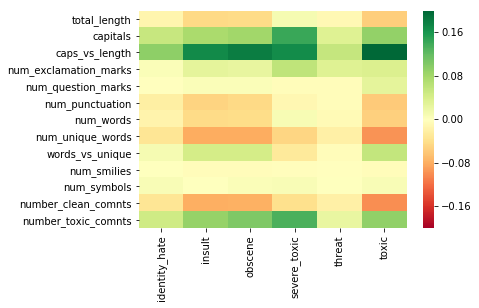

In [26]:
import seaborn as sns

ax = sns.heatmap(df_correlations, vmin=-0.2, vmax=0.2, center=0.0,cmap='RdYlGn')

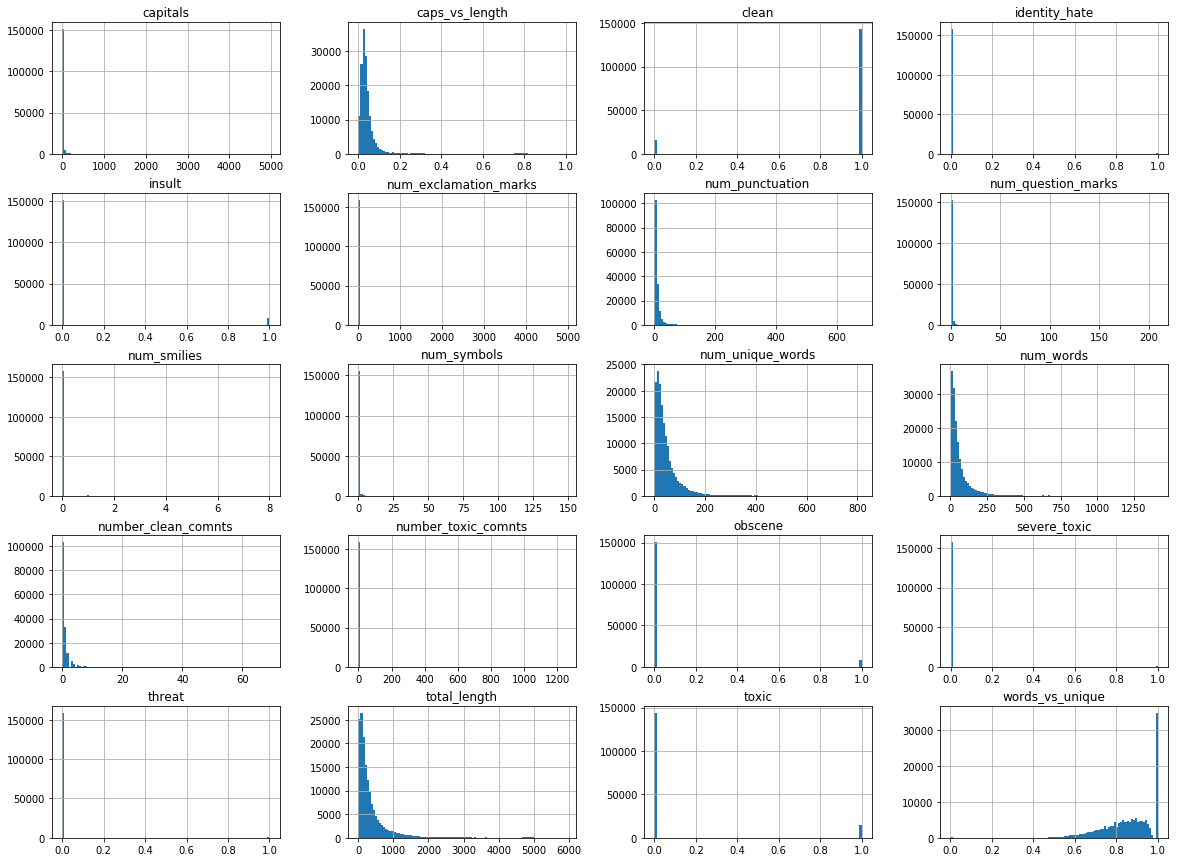

In [27]:
df_train.hist(bins=100, figsize=(20,15)) 
plt.show()